In [1]:
import numpy as np
import scipy as sp
import pandas as pd
from pandas import Series, DataFrame

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline
%precision 3

'%.3f'

In [2]:
from sklearn import linear_model

In [3]:
pwd

'C:\\Users\\User\\DataScience'

In [4]:
mkdir Chapter3

サブディレクトリまたはファイル Chapter3 は既に存在します。


In [5]:
cd ./Chapter3

C:\Users\User\DataScience\Chapter3


In [6]:
pwd

'C:\\Users\\User\\DataScience\\Chapter3'

In [7]:
import requests, zipfile
from io import StringIO
import io

In [8]:
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/00356/student.zip'

r = requests.get(url, stream=True)

z = zipfile.ZipFile(io.BytesIO(r.content))
z.extractall()

In [9]:
ls

 ドライブ C のボリューム ラベルは TIH0551600A です
 ボリューム シリアル番号は 820A-5C9D です

 C:\Users\User\DataScience\Chapter3 のディレクトリ

2024/09/26  11:10    <DIR>          .
2024/09/26  15:05    <DIR>          ..
2024/09/26  16:44             3,206 student.txt
2024/09/26  16:44            56,993 student-mat.csv
2024/09/26  16:44               269 student-merge.R
2024/09/26  16:44            93,220 student-por.csv
2024/09/26  12:28           100,485 wine_data.csv
               5 個のファイル             254,173 バイト
               2 個のディレクトリ  382,273,167,360 バイトの空き領域


In [10]:
student_data_math = pd.read_csv('student-mat.csv')

In [11]:
student_data_math.head()

,school;sex;age;address;famsize;Pstatus;Medu;Fedu;Mjob;Fjob;reason;guardian;traveltime;studytime;failures;schoolsup;famsup;paid;activities;nursery;higher;internet;romantic;famrel;freetime;goout;Dalc;Walc;health;absences;G1;G2;G3
0,"GP;""F"";18;""U"";""GT3"";""A"";4;4;""at_home"";""teacher..."
1,"GP;""F"";17;""U"";""GT3"";""T"";1;1;""at_home"";""other"";..."
2,"GP;""F"";15;""U"";""LE3"";""T"";1;1;""at_home"";""other"";..."
3,"GP;""F"";15;""U"";""GT3"";""T"";4;2;""health"";""services..."
4,"GP;""F"";16;""U"";""GT3"";""T"";3;3;""other"";""other"";""h..."


In [12]:
# データの読み込み
# 区切りに;が使われているので注意
student_data_math = pd.read_csv('student-mat.csv', sep=';')

In [13]:
student_data_math.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [14]:
?pd.read_csv

In [15]:
student_data_math.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

In [16]:
student_data_math['sex'].head()

0    F
1    F
2    F
3    F
4    F
Name: sex, dtype: object

In [17]:
student_data_math['absences'].head()

0     6
1     4
2    10
3     2
4     4
Name: absences, dtype: int64

In [18]:
student_data_math.groupby('sex')['age'].mean()

sex
F    16.730769
M    16.657754
Name: age, dtype: float64

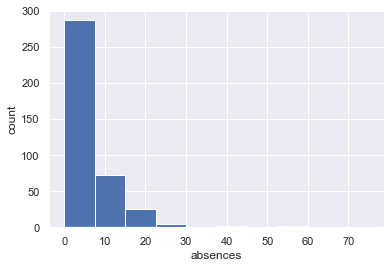

In [19]:
# histogram, データの指定
plt.hist(student_data_math['absences'])

# x軸とy軸のそれぞれのラベル
plt.xlabel('absences')
plt.ylabel('count')

# グリッドを付ける
plt.grid(True)

In [20]:
print('平均値:', student_data_math['absences'].mean())
print('中央値:', student_data_math['absences'].median())
print('最頻値:', student_data_math['absences'].mode())


平均値: 5.708860759493671
中央値: 4.0
最頻値: 0    0
Name: absences, dtype: int64


In [21]:
student_data_math['absences'].var(ddof=0)

63.887

In [22]:
# 標準偏差
student_data_math['absences'].std(ddof=0)

7.993

In [23]:
np.sqrt(student_data_math['absences'].var(ddof=0))

7.993

In [24]:
student_data_math['absences'].describe()

count    395.000000
mean       5.708861
std        8.003096
min        0.000000
25%        0.000000
50%        4.000000
75%        8.000000
max       75.000000
Name: absences, dtype: float64

In [25]:
# 四分位範囲(75% - 25%)
student_data_math['absences'].describe()[6] - student_data_math['absences'].describe()[4]

8.000

In [26]:
student_data_math.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,16.696203,2.749367,2.521519,1.448101,2.035443,0.334177,3.944304,3.235443,3.108861,1.481013,2.291139,3.554430,5.708861,10.908861,10.713924,10.415190
std,1.276043,1.094735,1.088201,0.697505,0.839240,0.743651,0.896659,0.998862,1.113278,0.890741,1.287897,1.390303,8.003096,3.319195,3.761505,4.581443
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,8.000000,9.000000,8.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000,11.000000,11.000000,11.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000


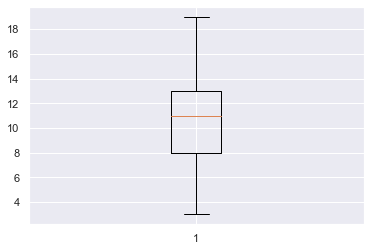

In [27]:
# 箱ひげ図 : G1
plt.boxplot(student_data_math['G1'])
plt.grid(True)

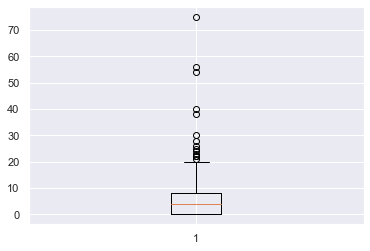

In [28]:
# 箱ひげ図 : 欠席数
plt.boxplot(student_data_math['absences'])
plt.grid(True)

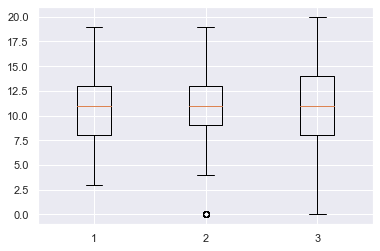

In [29]:
# 箱ひげ図 : G1, G2, G3
plt.boxplot([student_data_math['G1'], student_data_math['G2'], student_data_math['G3']])
plt.grid(True)

In [30]:
# 変動係数 : 欠席数
student_data_math['absences'].std(ddof=0) / student_data_math['absences'].mean()

1.400

In [31]:
student_data_math.std(ddof=0) / student_data_math.mean()

C:\Users\User\AppData\Local\Temp\ipykernel_9752\1134543222.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  student_data_math.std(ddof=0) / student_data_math.mean()


age           0.076330
Medu          0.397673
Fedu          0.431019
traveltime    0.481058
studytime     0.411791
failures      2.222501
famrel        0.227042
freetime      0.308334
goout         0.357645
Dalc          0.600679
Walc          0.561409
health        0.390651
absences      1.400097
G1            0.303881
G2            0.350641
G3            0.439324
dtype: float64

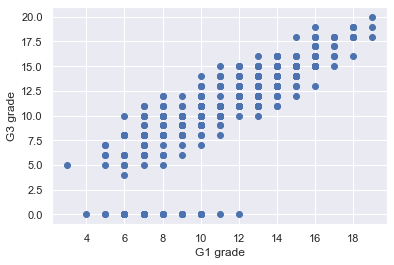

In [32]:
# 散布図
plt.plot(student_data_math['G1'], student_data_math['G3'], 'o')

# ラベル
plt.ylabel('G3 grade')
plt.xlabel('G1 grade')
plt.grid(True)

In [33]:
# 共分散行列
np.cov(student_data_math['G1'], student_data_math['G3'], ddof=0)

array([[10.989, 12.157],
       [12.157, 20.936]])

In [34]:
# 分散
print('G1の分散:', student_data_math['G1'].var(ddof=0))
print('G3の分散:', student_data_math['G3'].var(ddof=0))


G1の分散: 10.989161993270304
G3の分散: 20.93647812850505


In [35]:
sp.stats.pearsonr(student_data_math['G1'], student_data_math['G3'])

(0.801, 0.000)

In [36]:
# 相関行列
np.corrcoef([student_data_math['G1'], student_data_math['G3']])

array([[1.   , 0.801],
       [0.801, 1.   ]])

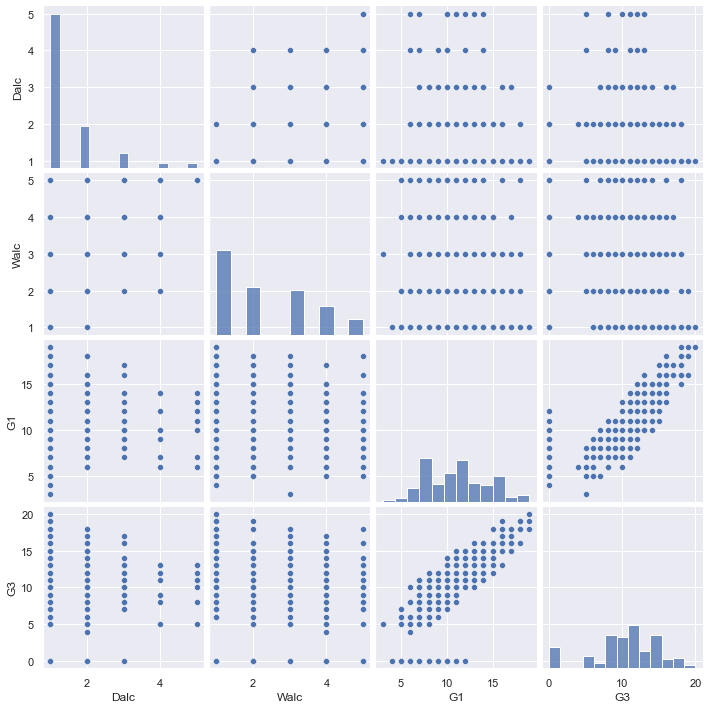

In [37]:
sns.pairplot(student_data_math[['Dalc', 'Walc', 'G1', 'G3']])
plt.grid(True)

In [38]:
student_data_math.groupby('Walc')['G1'].mean()

Walc
1    11.178808
2    11.270588
3    10.937500
4     9.980392
5     9.964286
Name: G1, dtype: float64

In [39]:
student_data_por = pd.read_csv("student-por.csv", sep=';')
student_data_por

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644,MS,F,19,R,GT3,T,2,3,services,other,...,5,4,2,1,2,5,4,10,11,10
645,MS,F,18,U,LE3,T,3,1,teacher,services,...,4,3,4,1,1,1,4,15,15,16
646,MS,F,18,U,GT3,T,1,1,other,other,...,1,1,1,1,1,5,6,11,12,9
647,MS,M,17,U,LE3,T,3,1,services,services,...,2,4,5,3,4,2,6,10,10,10


In [40]:
student_data_math_por = pd.merge(student_data_math,
         student_data_por,
         on = ['school','sex','age','address','famsize','Pstatus','Medu','Fedu','Mjob','Fjob','reason','nursery','internet'],
        suffixes=('_math', '_por'))
student_data_math_por.describe()

,age,Medu,Fedu,traveltime_math,studytime_math,failures_math,famrel_math,freetime_math,goout_math,Dalc_math,...,famrel_por,freetime_por,goout_por,Dalc_por,Walc_por,health_por,absences_por,G1_por,G2_por,G3_por
count,382.000000,382.000000,382.000000,382.000000,382.000000,382.000000,382.000000,382.000000,382.000000,382.000000,...,382.000000,382.000000,382.000000,382.000000,382.000000,382.000000,382.000000,382.000000,382.000000,382.000000
mean,16.586387,2.806283,2.565445,1.442408,2.034031,0.290576,3.939791,3.222513,3.112565,1.473822,...,3.942408,3.230366,3.117801,1.476440,2.290576,3.575916,3.672775,12.112565,12.238220,12.515707
std,1.173470,1.086381,1.096240,0.695378,0.845798,0.729481,0.921620,0.988233,1.131927,0.886229,...,0.908884,0.985096,1.133710,0.886303,1.282577,1.404248,4.905965,2.556531,2.468341,2.945438
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,5.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,...,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,10.000000,11.000000,11.000000
50%,17.000000,3.000000,3.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,...,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,2.000000,12.000000,12.000000,13.000000
75%,17.000000,4.000000,4.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,...,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,6.000000,14.000000,14.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,32.000000,19.000000,19.000000,19.000000


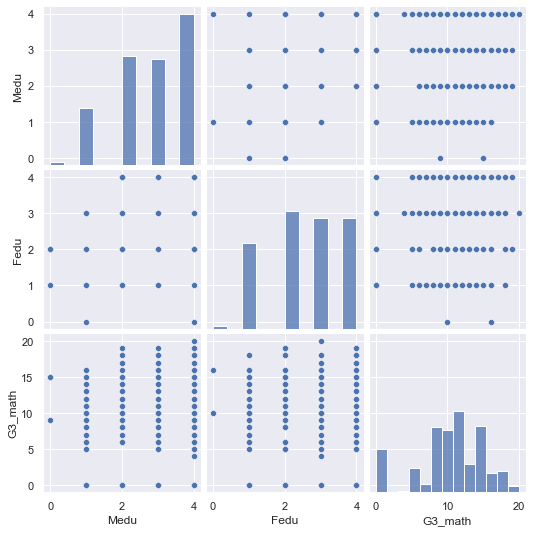

In [41]:
sns.pairplot(student_data_math_por[['Medu','Fedu','G3_math']])
plt.grid(True)

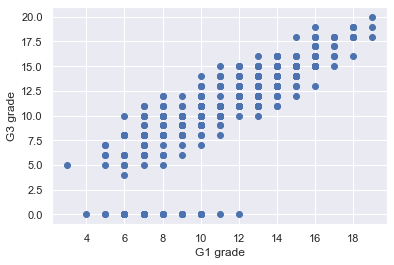

In [42]:
# 散布図
plt.plot(student_data_math['G1'], student_data_math['G3'], 'o')
plt.xlabel('G1 grade')
plt.ylabel('G3 grade')
plt.grid(True)

In [43]:
from sklearn import linear_model

# 線形回帰のインスタンスを生成
reg = linear_model.LinearRegression()

In [44]:
# 説明変数に一学期目の数学の成績を利用
# locはデータフレームから、行と列を指定して取り出す。loc[:, ['G1']]はG1列のすべての行を取り出すことにしている。
# valuesに直しているので、注意
X = student_data_math.loc[:, ['G1']].values

# 目的変数に最終の数学の成績を利用
Y = student_data_math['G3'].values

# 予測モデルを計算、ここでa, bを算出
reg.fit(X, Y)

# 回帰係数
print('回帰分析:', reg.coef_)

# 切片
print('切片:', reg.intercept_)

回帰分析: [1.106]
切片: -1.652803828800458


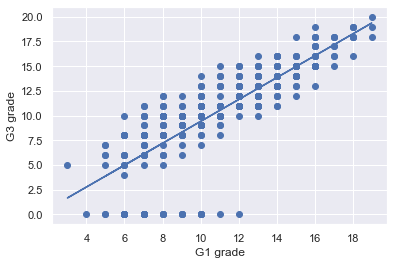

In [45]:
# 先ほどと同じ散布図
plt.scatter(X, Y)
plt.xlabel('G1 grade')
plt.ylabel('G3 grade')

# その上に線形回帰直線を引く
plt.plot(X, reg.predict(X))
plt.grid(True)

In [46]:
# 決定係数、寄与率とも呼ばれる
print('決定係数:', reg.score(X, Y))

決定係数: 0.64235084605227


In [47]:
X = student_data_por.loc[:,['G1']].values
Y = student_data_por['G3'].values
reg.fit(X, Y)
print('回帰係数:', reg.coef_)
print('切片:', reg.intercept_)
print('決定係数', reg.score(X, Y))

回帰係数: [0.973]
切片: 0.8203984121064565
決定係数 0.6829156800171083


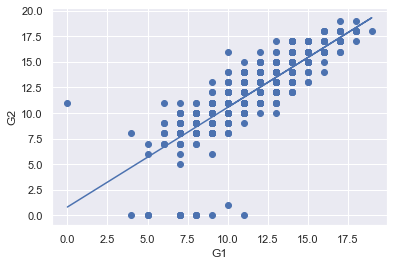

In [48]:
plt.scatter(X, Y)
plt.xlabel('G1')
plt.ylabel('G2')

plt.plot(X, reg.predict(X))
plt.grid(True)

In [49]:
X = student_data_por.loc[:, ['absences']].values
reg.fit(X, Y)
print('回帰係数:', reg.coef_)
print('切片:', reg.intercept_)
print('決定係数:', reg.score(X, Y))

回帰係数: [-0.064]
切片: 12.138800862687443
決定係数: 0.008350131955637385


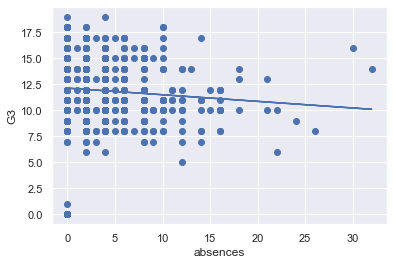

In [50]:
plt.scatter(X, Y)
plt.xlabel('absences')
plt.ylabel('G3')

plt.plot(X, reg.predict(X))
plt.grid(True)

In [51]:
wine_data = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv', sep=';')
wine_data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [52]:
wine_data.describe()
wine_data.to_csv('wine_data.csv')

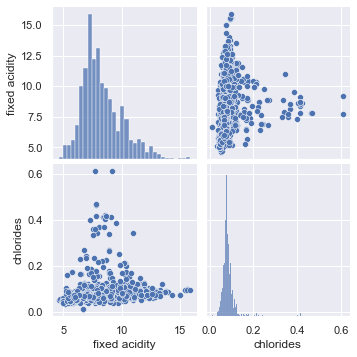

In [53]:
sns.pairplot(wine_data[["fixed acidity", "chlorides"]])

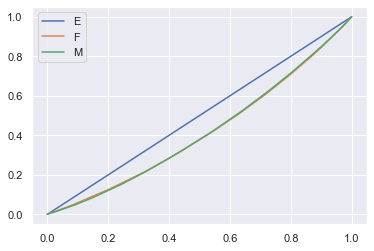

In [54]:
student_data_math_F = student_data_math[student_data_math.sex=='F']
student_data_math_M = student_data_math[student_data_math.sex=='M']

student_data_math_sorted_F = student_data_math_F.G1.sort_values()
student_data_math_sorted_M = student_data_math_M.G1.sort_values()

len_F = np.arange(len(student_data_math_sorted_F))
len_M = np.arange(len(student_data_math_sorted_M))

plt.plot(len_F / len_F.max(), len_F / len_F.max(), label='E')
plt.plot(len_F / len_F.max(), student_data_math_sorted_F.cumsum() / student_data_math_sorted_F.sum(), label='F')
plt.plot(len_M / len_M.max(), student_data_math_sorted_M.cumsum() / student_data_math_sorted_M.sum(), label='M')
plt.legend()
plt.grid(True)

In [62]:
def gini(data_s):
    su=0
    sum_arr=[]
    for i in range(0, len(data_s)-1):
        for j in range(i + 1, len(data_s)):
            sum_arr = np.append(sum_arr, np.abs(data_s[i] - data_s[j]))
            #su = np.abs(data_s[i] - data_s[j]) + su
    return (sum_arr.sum() * 2) / (2 * len(data_s)**2 * np.mean(data_s))
print('女性のジニ関数:', gini(np.array(student_data_math_sorted_F)))
print('男性のジニ関数:', gini(np.array(student_data_math_sorted_M)))


女性のジニ関数: 0.1723782950865341
男性のジニ関数: 0.17197351667939903
